In [1]:
import sys
import os

parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

from utilities_new_new import *


c:\Users\Me\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
def compare_classifiers(classifiers, descriptions, ids,rejection_rates_heuristic,id_efficiencies_heuristic,title_string,figsize=(10,10)):
    # Read and plot ROC data
    plt.figure(figsize=figsize)
    for classifier, desc, id_ in zip(classifiers, descriptions, ids):
        fpr, tpr, roc_auc = read_roc(classifier, desc, id_)
        if fpr and tpr:
            plt.plot(fpr, tpr, lw=2, label=f"{classifier} (AUC = {roc_auc:.4f})")
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

    plt.xlabel('False Positive Rate (Electron Efficiency)')
    plt.ylabel('True Positive Rate (Jet Survivial Probability)')
    plt.title(title_string+' ROC Curve Comparison')
    plt.legend(loc='lower left')
    for i in range(1,4):
        plt.scatter(1.-rejection_rates_heuristic[i],id_efficiencies_heuristic[i], color='r', marker='s', label='Heuristic' if i == 1 else '')
    plt.show()


    # Read and plot ROC data
    plt.figure(figsize=figsize)
    for classifier, desc, id_ in zip(classifiers, descriptions, ids):
        fpr, tpr, roc_auc = read_roc(classifier, desc, id_)
        if fpr and tpr:
            plt.plot(fpr, tpr, lw=2, label=f"{classifier} (AUC = {roc_auc:.4f})")
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 0.2])
    plt.ylim([0.92, 1.0])
    plt.xlabel('False Positive Rate (Electron Efficiency)')
    plt.ylabel('True Positive Rate (Jet Survivial Probability)')
    plt.title( title_string+'ROC Curve Comparison')
    plt.legend(loc='lower left')
    for i in range(1,4):
        plt.scatter(1.-rejection_rates_heuristic[i],id_efficiencies_heuristic[i], color='r', marker='s', label='Heuristic' if i == 1 else '')
    plt.show()

    # Read and plot Precision-Recall data
    plt.figure(figsize=figsize)
    for classifier, desc, id_ in zip(classifiers, descriptions, ids):
        precision, recall, pr_auc, _ = read_precision_recall(classifier, desc, id_)
        if precision and recall:
            plt.plot(recall, precision, lw=2, label=f"{classifier} (AUC = {pr_auc:.4f})")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title_string+' Precision-Recall Curve Comparison')
    plt.legend(loc='lower left')
    plt.show()

    # # Read and plot Efficiency vs Electron PT data
    # plt.figure(figsize=figsize)
    # for classifier, desc, id_ in zip(classifiers, descriptions, ids):
    #     bins, eff = read_efficiency_vs_ele_PT(classifier, desc, id_)
    #     if bins and eff:
    #         plt.bar(bins[:-1], eff, width=np.diff(bins), alpha=0.5, align='edge', edgecolor='black', label=f"{classifier} {id_}")
    # plt.xlabel('Electron $p_T$')
    # plt.ylabel('Efficiency')
    # plt.title(title_string+'Efficiency vs Electron $p_T$ Comparison')
    # plt.legend()
    # plt.show()

    # plt.figure(figsize=figsize)

    # eff_data = []
    # bin_edges = None

    # # First loop to read and store efficiency data
    # for classifier, desc, id_ in zip(classifiers, descriptions, ids):
    #     bins, eff = read_efficiency_vs_ele_PT(classifier, desc, id_)
    #     if bins and eff:
    #         eff_data.append((classifier, id_, bins, eff))
    #         if bin_edges is None:
    #             bin_edges = bins  # Store the bin edges from the first valid dataset

    # # Ensure we have valid bin data
    # if bin_edges is not None:
    #     num_classifiers = len(eff_data)  # Number of classifiers to plot
    #     bar_width_factor = 0.9  # Factor to control total bin width usage
    #     bar_widths = np.diff(bin_edges) * (bar_width_factor / num_classifiers)  # Adjust bar widths

    #     # Second loop to plot bars with appropriate offsets
    #     for i, (classifier, id_, bins, eff) in enumerate(eff_data):
    #         shifted_bins = bin_edges[:-1] + (i - (num_classifiers - 1) / 2) * bar_widths
    #         plt.bar(shifted_bins, eff, width=bar_widths, align='edge', edgecolor='black', label=f"{classifier} {id_}")

    # plt.xlabel('Electron $p_T$')
    # plt.ylabel('Efficiency')
    # plt.title(title_string + ' Efficiency vs Electron $p_T$ Comparison')
    # plt.legend()
    # plt.show()

    
    for classifier, desc, id_ in zip(classifiers, descriptions, ids):
        bins, eff = read_efficiency_vs_ele_PT(classifier, desc, id_)
        if bins and eff:
            plt.figure(figsize=figsize)
            plt.bar(bins[:-1], eff, width=np.diff(bins), alpha=0.5, align='edge', edgecolor='black')
            plt.xlabel('Electron $p_T$/GeV')
            plt.ylabel('Recall')
            plt.title(' Recall vs Electron $p_T$ for '+classifier+" (isolation variables + topoclusters)")
            plt.legend(loc='lower left')

            plt.show()

File iso_topocluster_Zee_Large_ring_001250025005010204_eqTrue\roc\roc__VotingClassifier.json not found.


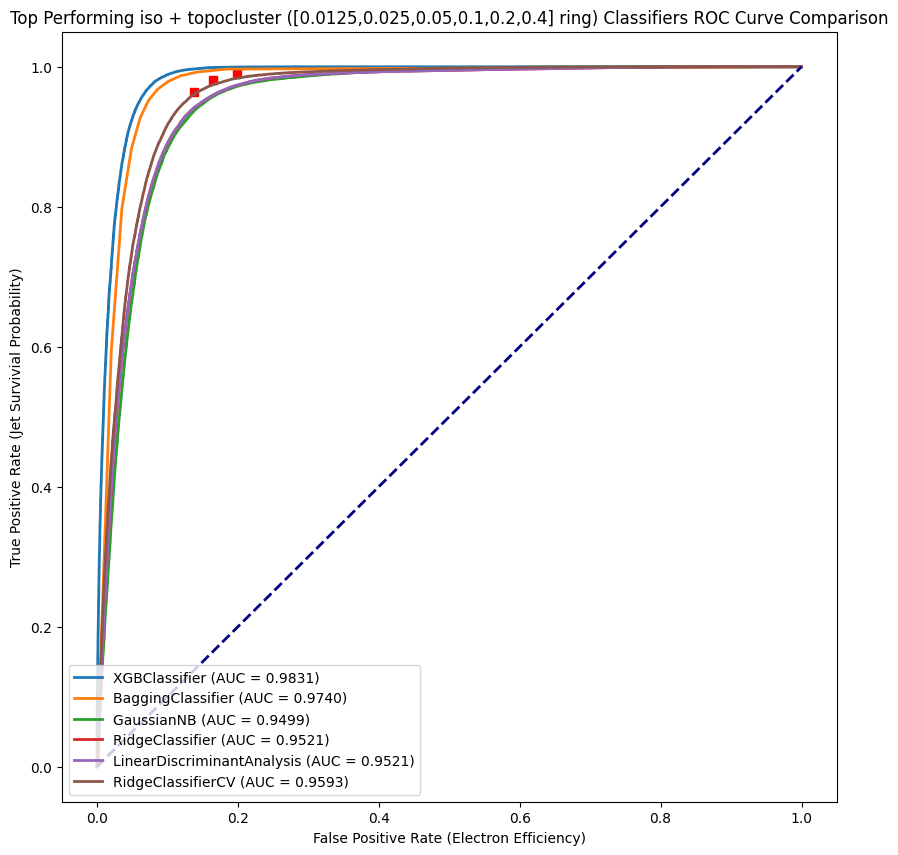

File iso_topocluster_Zee_Large_ring_001250025005010204_eqTrue\roc\roc__VotingClassifier.json not found.


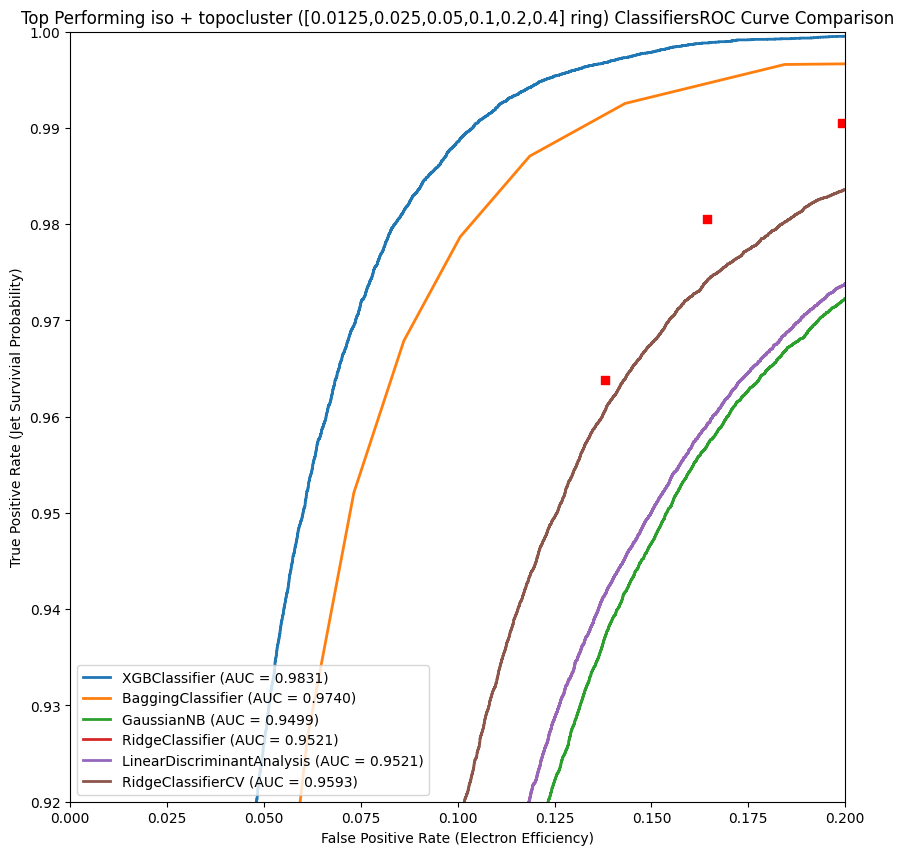

File iso_topocluster_Zee_Large_ring_001250025005010204_eqTrue\precision_recall\precision_recall__VotingClassifier.json not found.


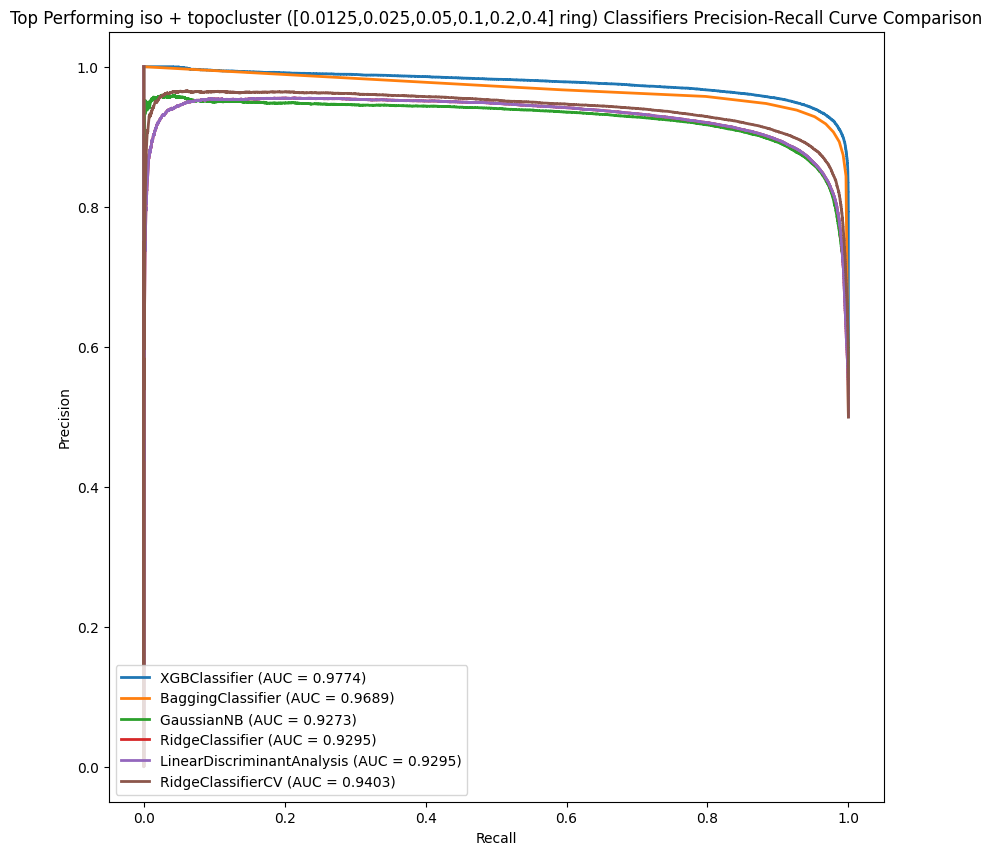

C:\Users\Me\AppData\Local\Temp\ipykernel_31288\3138533989.py:99: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left')


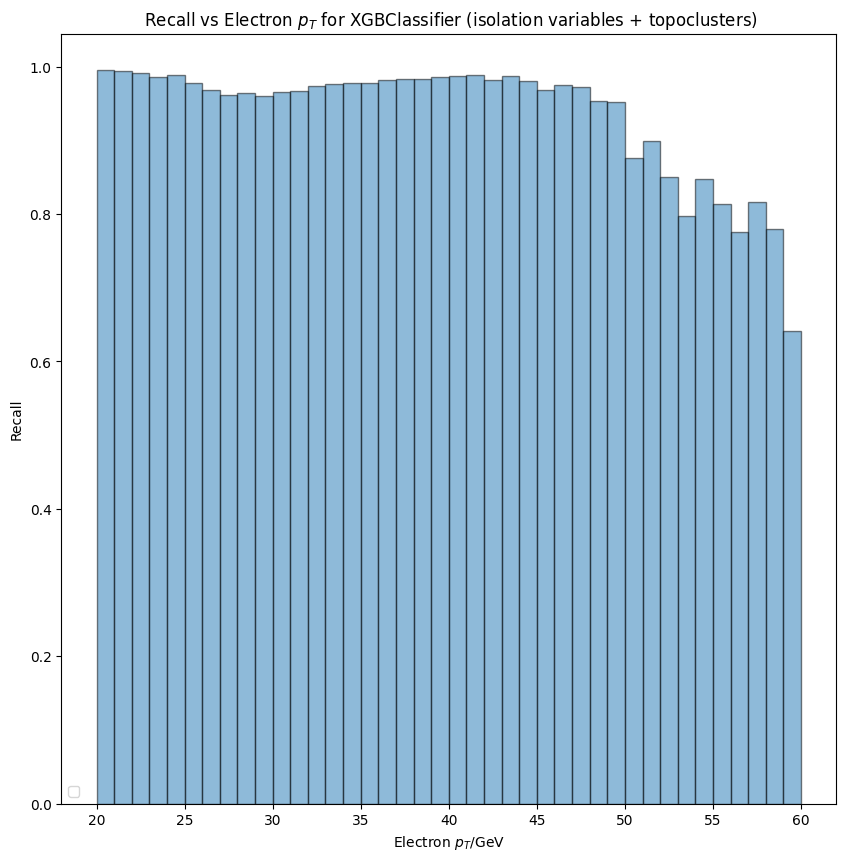

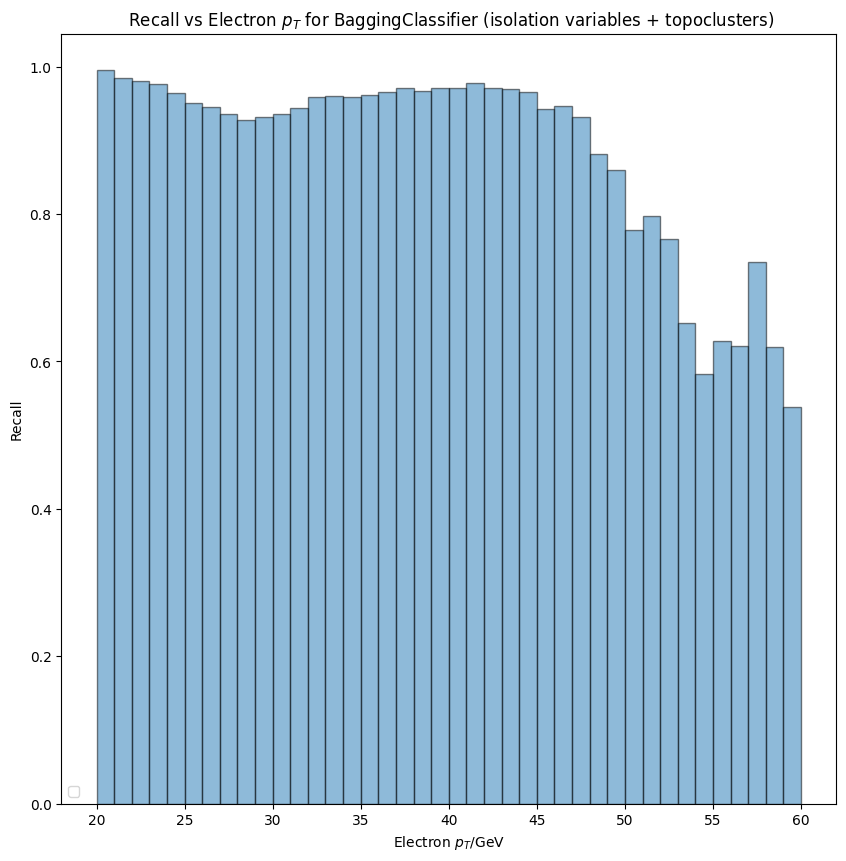

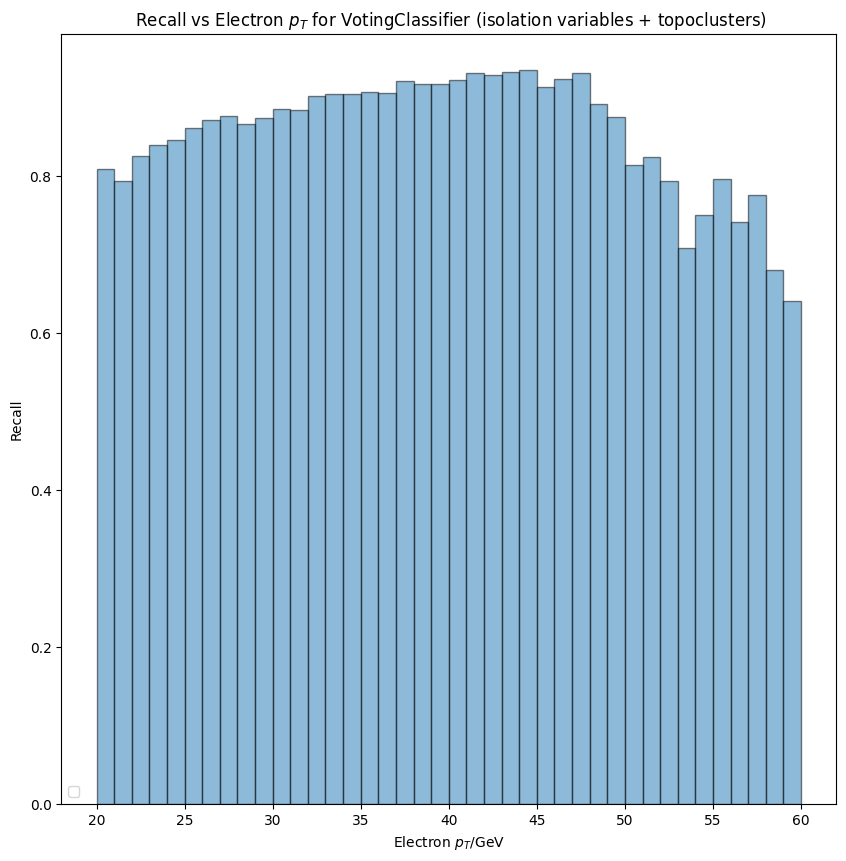

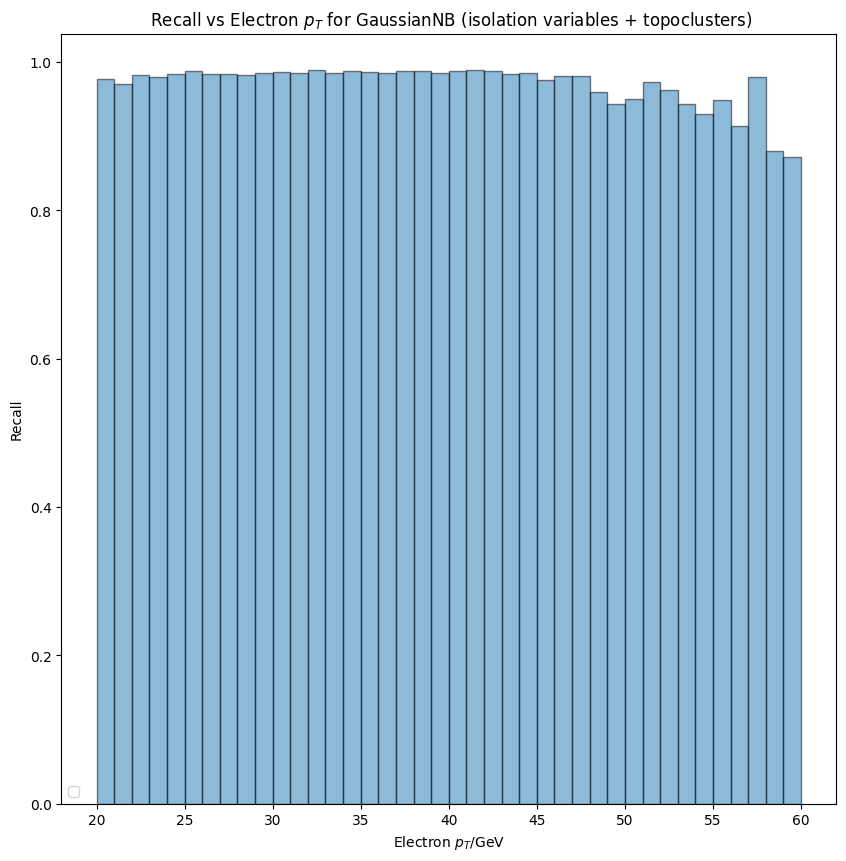

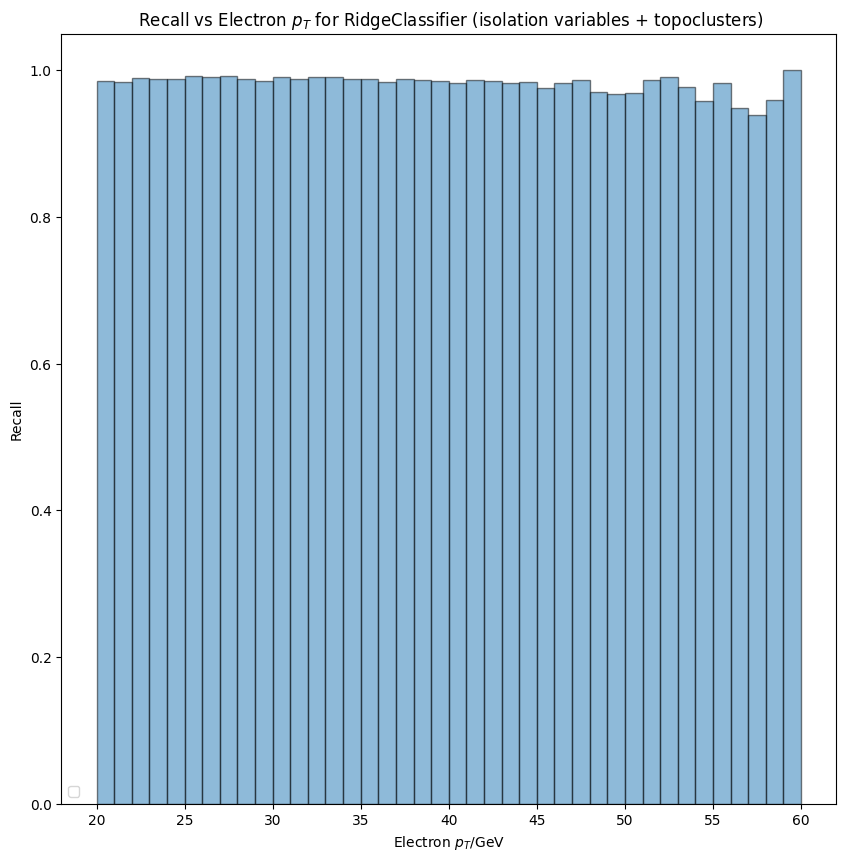

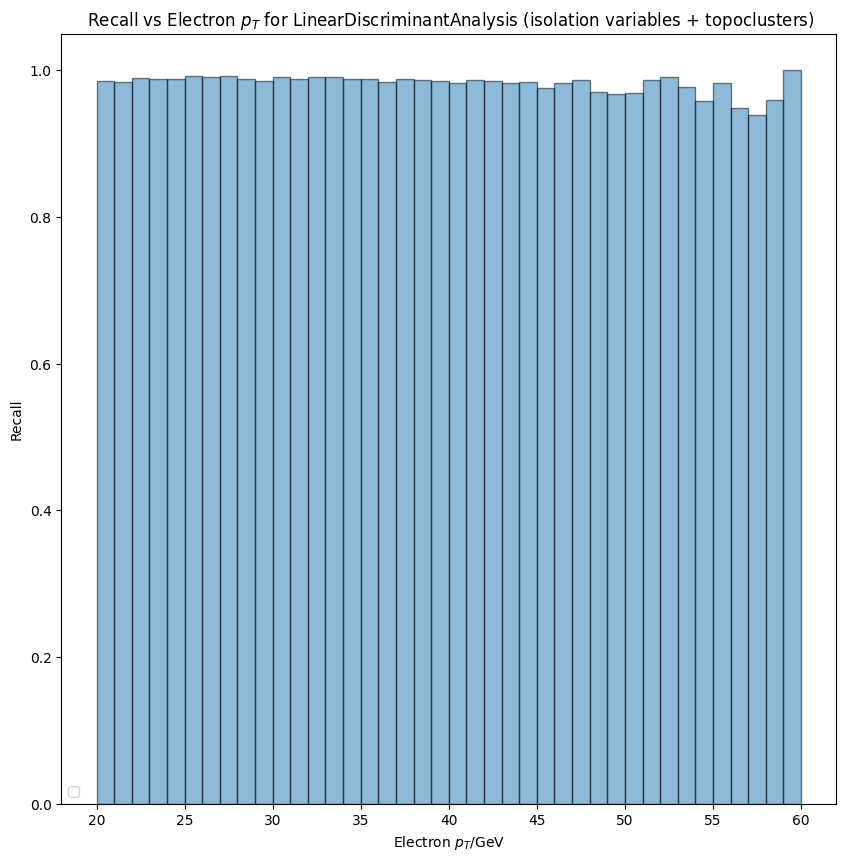

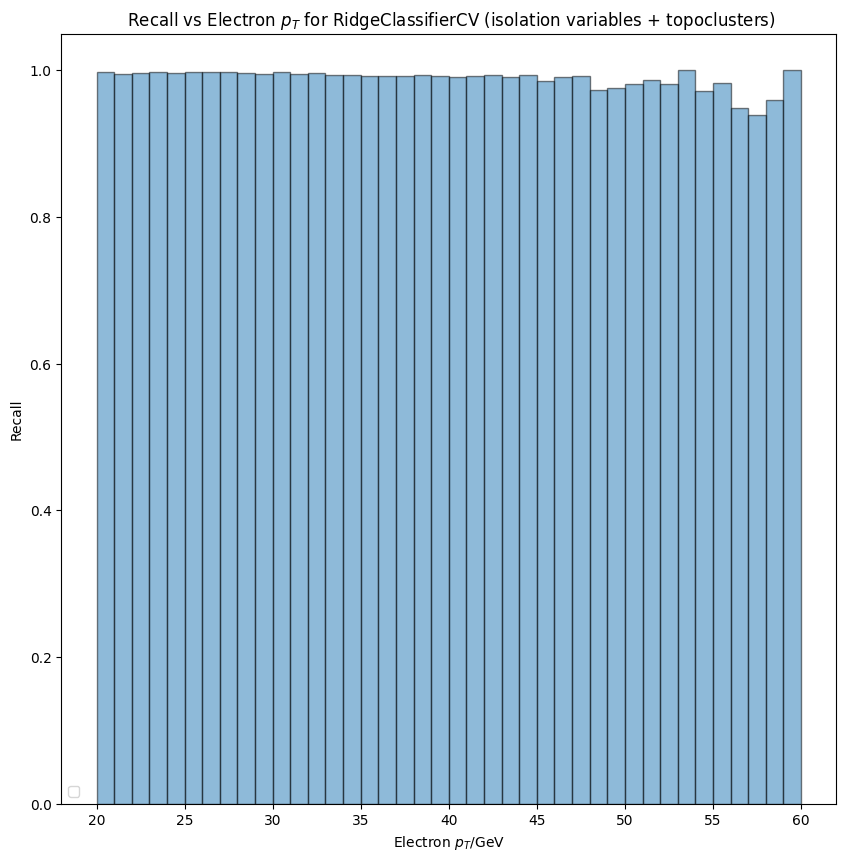

In [9]:
classifiers = ["XGBClassifier", "BaggingClassifier","VotingClassifier","GaussianNB","RidgeClassifier","LinearDiscriminantAnalysis","RidgeClassifierCV"]
descriptions = ["" for i in range(len(classifiers))]
ids = ["iso_topocluster_Zee_Large_ring_001250025005010204_eqTrue" for i in range(len(classifiers))]
figsize=(8, 8)
rejection_rates_heuristic =  [0.0, 0.8009311588352441, 0.8357150546315733, 0.8618870768071478]
id_efficiencies_heuristic = [1.0, 0.9905439553132065, 0.9805160260672962, 0.9638515760074478]
compare_classifiers(classifiers, descriptions, ids,rejection_rates_heuristic,id_efficiencies_heuristic,"Top Performing iso + topocluster ([0.0125,0.025,0.05,0.1,0.2,0.4] ring) Classifiers",figsize=(10,10))